## Week 4 Assignment: Looking at Land Value in LA Chinatown

**Name**: Clara Fuchshuber

This week I will be mapping land value obtained from the LA Assessor's office in Chinatown. Hopefully I'll be able to this for multiple years of Chinatown's history, to see how land values have changed over time and to what degree.

In [2]:
# First importing our libraries
import pandas
import geopandas
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Import data that Dom has transformed into geojson files
assessor_2006_raw = geopandas.read_file("Assessor_Parcels_Data_2006_TRA.geojson")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [4]:
# Take a look to make sure the data we're exploring is there
assessor_2006_raw.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 142 columns):
 #    Column                       Dtype              
---   ------                       -----              
 0    OBJECTID_1                   float64            
 1    AIN                          object             
 2    APN                          object             
 3    SitusHouse                   object             
 4    SitusFract                   object             
 5    SitusDirec                   object             
 6    SitusUnit                    object             
 7    SitusStree                   object             
 8    SitusAddre                   object             
 9    SitusCity                    object             
 10   SitusZIP                     object             
 11   SitusFullA                   object             
 12   TaxRateAre                   object             
 13   TaxRateCit                   object             
 14 

In [7]:
assessor_2006_raw.head()

OBJECTID_1         AIN           APN SitusHouse SitusFract SitusDirec  \
0   1245695.0  5414007015  5414-007-015        999       None          N   
1   1244222.0  5406028127  5406-028-127        918       None          W   
2   1244952.0  5409016030  5409-016-030        908       None       None   
3   1244337.0  5407007040  5407-007-040        716       None       None   
4   1244506.0  5407022001  5407-022-001        734       None          N   

  SitusUnit    SitusStree              SitusAddre       SitusCity  ...  \
0      None      BROADWAY          999 N BROADWAY  LOS ANGELES CA  ...   
1       317    COLLEGE ST  918 W COLLEGE ST   317  LOS ANGELES CA  ...   
2      None      AVILA ST            908 AVILA ST  LOS ANGELES CA  ...   
3         A  NEW DEPOT ST    716 NEW DEPOT ST   A  LOS ANGELES CA  ...   
4      None       HILL PL           734 N HILL PL  LOS ANGELES CA  ...   

  StreetDirection    StreetName UnitNo            City ZIPcode5  \
0               N      BROADWAY         LOS ANGELES CA  90012.0   
1               W    COLLEGE ST    317  LOS ANGELES CA  90012.0   
2                      AVILA ST         LOS ANGELES CA  90012.0   
3                  NEW DEPOT ST      A  LOS ANGELES CA  90012.0   
4               N       HILL PL         LOS ANGELES CA  90012.0   

            rowID CENTER_LAT_y CENTER_LON_y                    Location 1  \
0  20065414007015    34.066669  -118.236365  (34.06666874, -118.23636466)   
1  20065406028127    34.066379  -118.245243  (34.06637901, -118.24524342)   
2  20065409016030    34.057575  -118.232612   (34.0575754, -118.23261206)   
3  20065407007040    34.064930  -118.242581   (34.06492964, -118.2425805)   
4  20065407022001    34.062405  -118.242174  (34.06240475, -118.24217396)   

                                            geometry  
0  POLYGON Z ((-118.23615 34.06662 0.00000, -118....  
1  POLYGON Z ((-118.24515 34.06608 0.00000, -118....  
2  POLYGON Z ((-118.23247 34.05774 0.00000, -118....  
3  POLYGON Z ((-118.24270 34.06474 0.00000, -118....  
4  POLYGON Z ((-118.24245 34.06255 0.00000, -118....  

[5 rows x 142 columns]

In [8]:
# I'll work with this data for the year 2006, then once I'm finished creating the map/visualizations I will loop for the other assessor data years
columns_to_keep = ['TotalValue','geometry','LandValue','YearBuilt']

In [9]:
# Create new dataframe with chosen columns
assessor_2006 = assessor_2006_raw[columns_to_keep]

<AxesSubplot: >

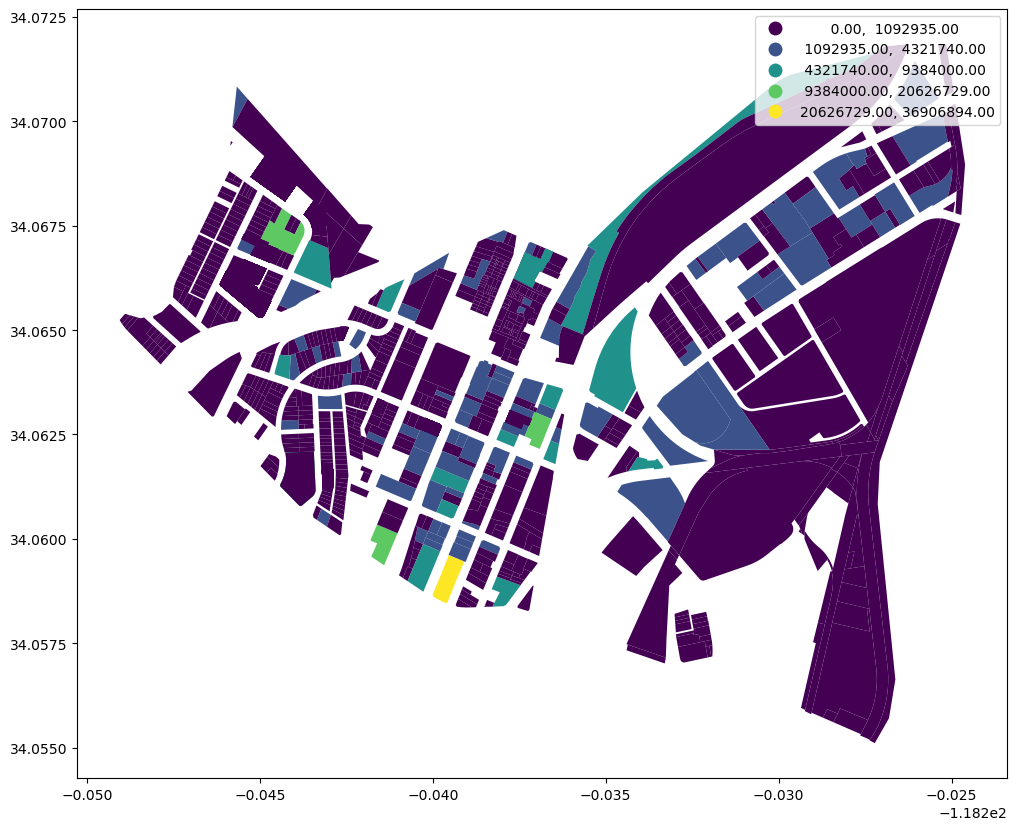

In [10]:
# Map to see what TotalValue data looks like
assessor_2006.plot(figsize=(12,10),
                   column='TotalValue',
                   legend=True,
                   scheme='NaturalBreaks')

<AxesSubplot: >

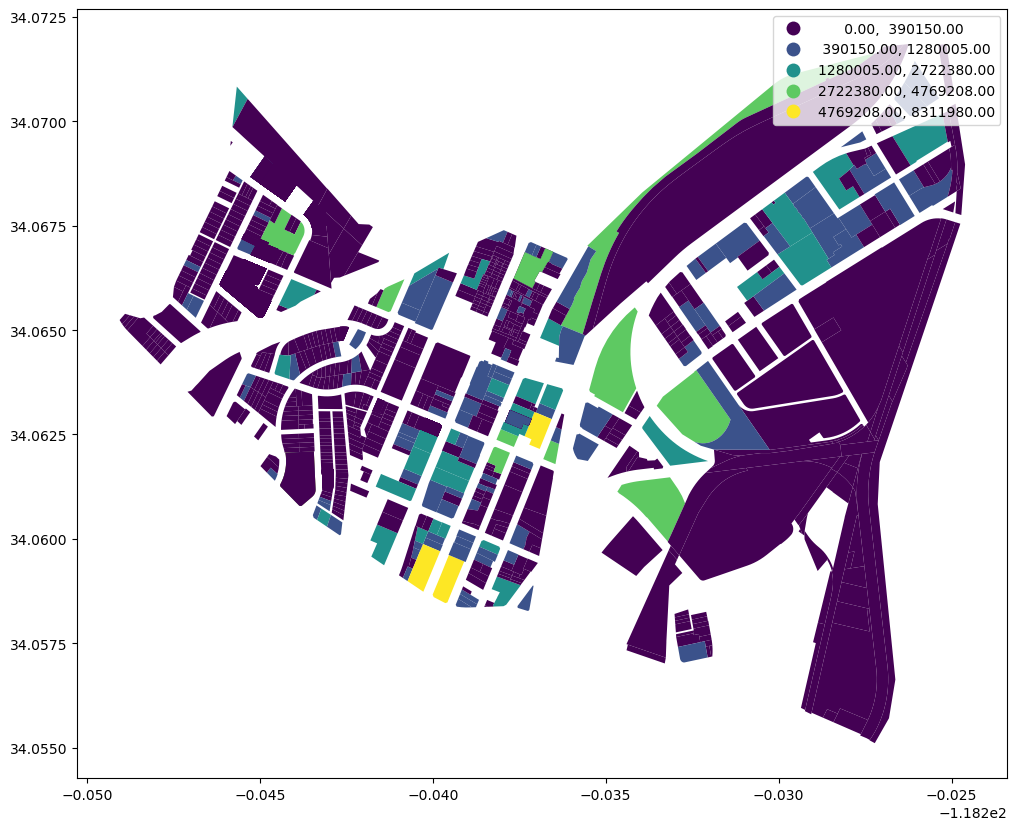

In [11]:
# Map LandValue and see hwo it differs from TotalValue
assessor_2006.plot(figsize=(12,10),
                   column='LandValue',
                   legend=True,
                   scheme='NaturalBreaks')

In [12]:
# Let's look at some statistical values for parcel's TotalValue
assessor_2006.TotalValue.describe()

count    1.095000e+03
mean     5.478814e+05
std      1.727588e+06
min      0.000000e+00
25%      9.457300e+04
50%      1.997560e+05
75%      4.351585e+05
max      3.690689e+07
Name: TotalValue, dtype: float64

## Importing Yearly Data and Creating Maps

Now that I know I can manipulate one year of assessor's data, I'm going to try and import all the other years of data I have (2006-2021). I will then create maps on the TotalValue/LandValue for each of the datasets. I will create a new column on each dataset that assigns the data the year it was collected, then merge all the disparate datasets into one large dataframe. The data from each year will not be lost because of the new column I've added. Then I can create graphs that visualize TotalValue/LandValue as bar charts. 

In [13]:
# Create an array of all years of assessor data using for loop
parcel_dataframes = []

for year in range(2006,2022):
    parcel_data_filepath = "Assessor_Parcels_Data_" + str(year) + "_TRA.geojson"
    parcel_dataframe_raw = geopandas.read_file(parcel_data_filepath)
    parcel_dataframe = parcel_dataframe_raw[columns_to_keep].copy()
    parcel_dataframe['Year'] = year
    parcel_dataframes.append(parcel_dataframe)

print(parcel_dataframes[0].info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TotalValue  1095 non-null   float64 
 1   geometry    1095 non-null   geometry
 2   LandValue   1095 non-null   float64 
 3   YearBuilt   1095 non-null   int64   
 4   Year        1095 non-null   int64   
dtypes: float64(2), geometry(1), int64(2)
memory usage: 42.9 KB
None


In [14]:
# Ensure that the new column we created does track the data by year
print(parcel_dataframes[5].sample(5))

      TotalValue                                           geometry  \
5       248435.0  POLYGON Z ((-118.24344 34.06743 0.00000, -118....   
1015    127791.0  POLYGON Z ((-118.23770 34.06731 0.00000, -118....   
339     185397.0  POLYGON Z ((-118.24643 34.06700 0.00000, -118....   
820     402478.0  POLYGON Z ((-118.24432 34.06689 0.00000, -118....   
1034     78000.0  POLYGON Z ((-118.23974 34.06269 0.00000, -118....   

      LandValue  YearBuilt  Year  
5       40710.0       1989  2011  
1015    52987.0          0  2011  
339     37870.0       1921  2011  
820     41820.0       1975  2011  
1034    31000.0       1983  2011  


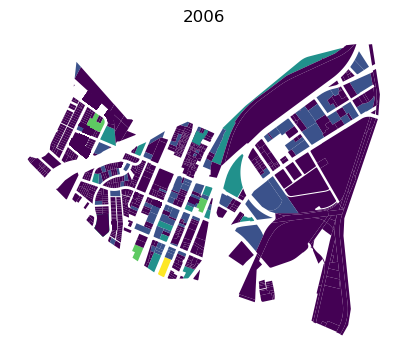

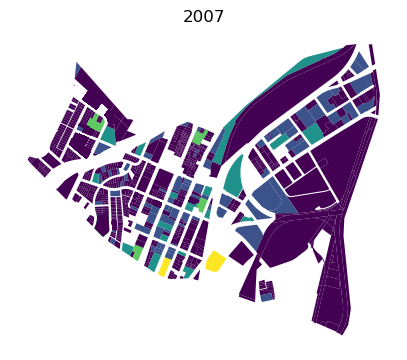

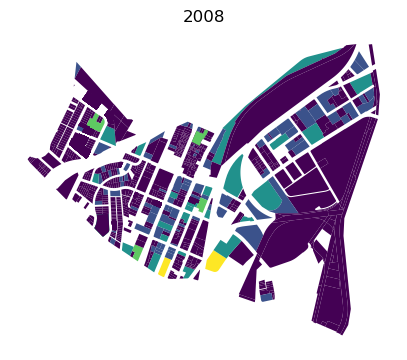

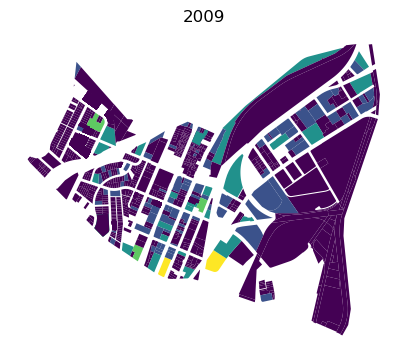

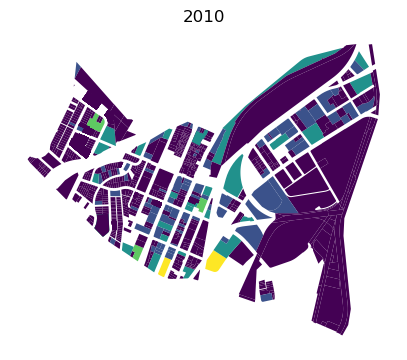

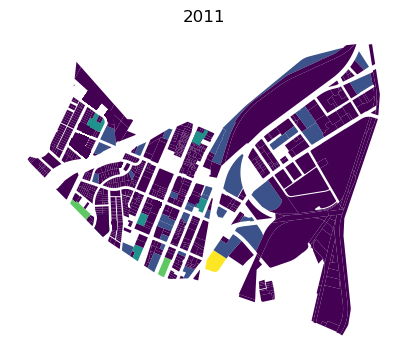

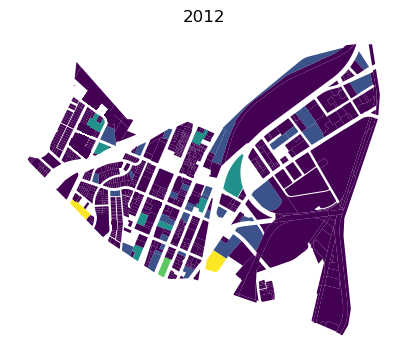

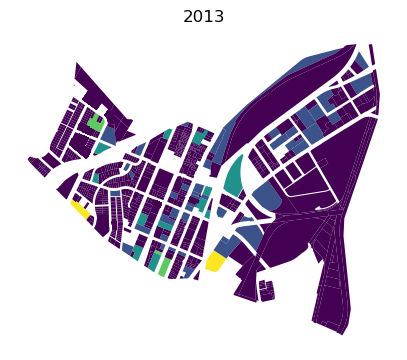

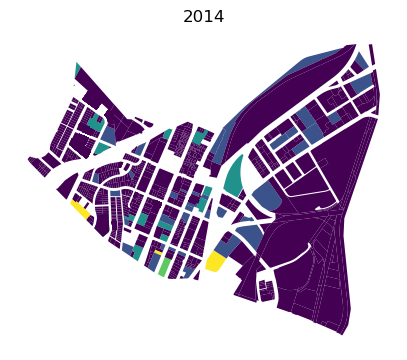

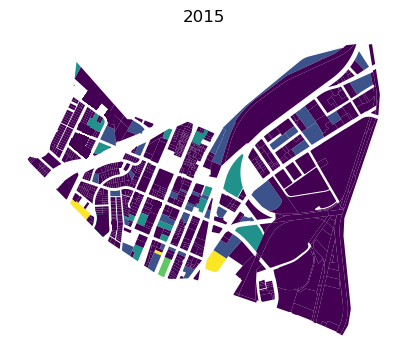

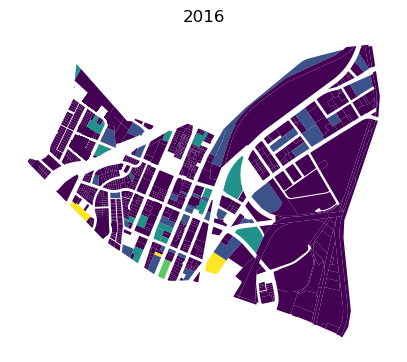

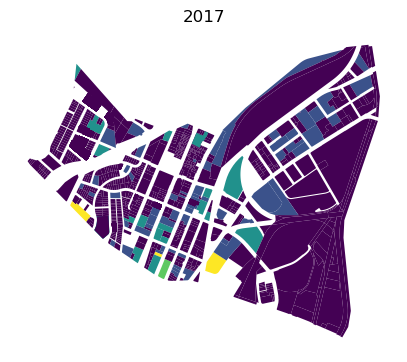

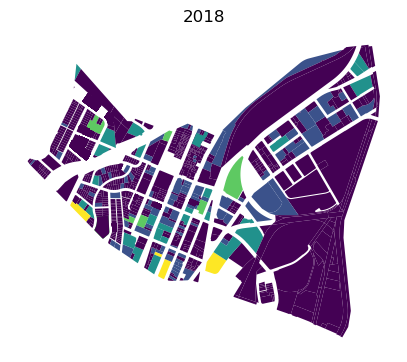

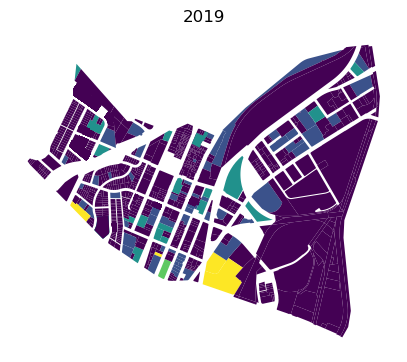

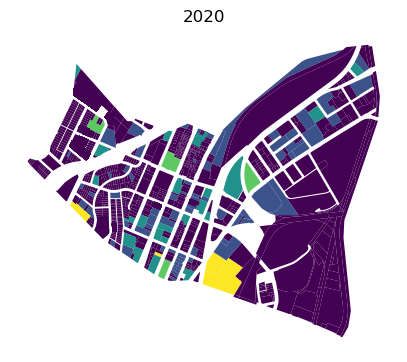

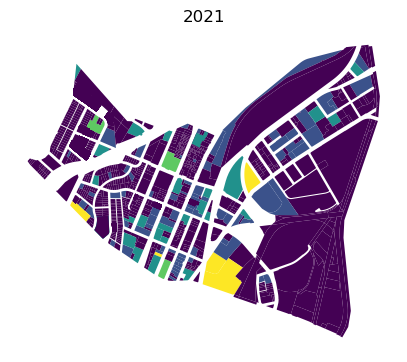

In [15]:
# Now create for loop to print out all maps for Total Value

for parcel_dataframe in parcel_dataframes:
    fig, ax = plt.subplots(figsize=(5,5))
    parcel_dataframe.plot(ax=ax,
                          column='TotalValue',
                          scheme='NaturalBreaks')
    ax.set_title(parcel_dataframe['Year'][0])
    ax.axis('off')
    

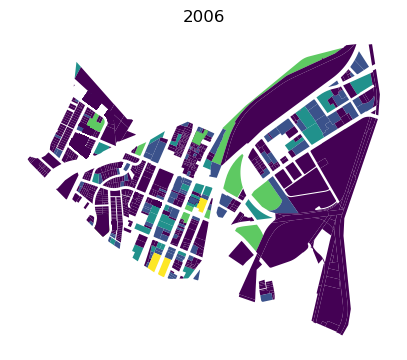

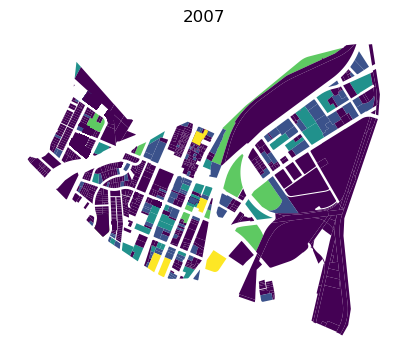

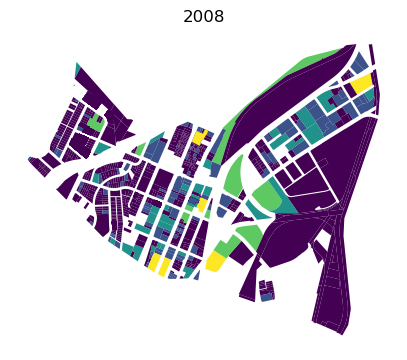

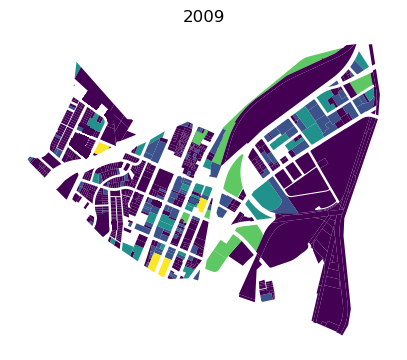

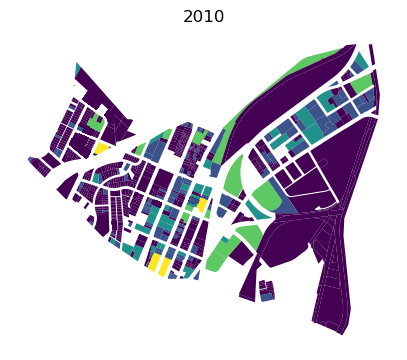

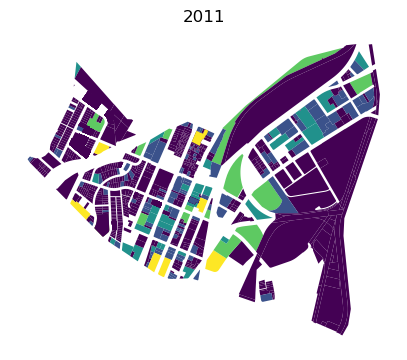

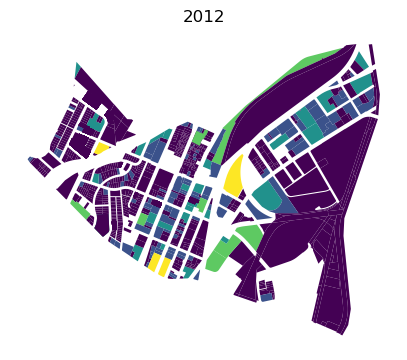

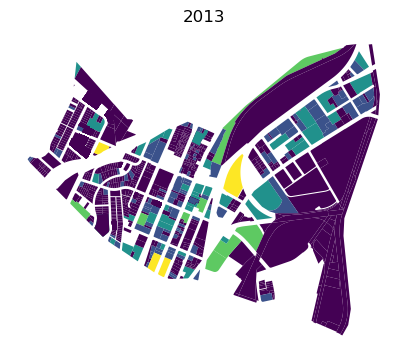

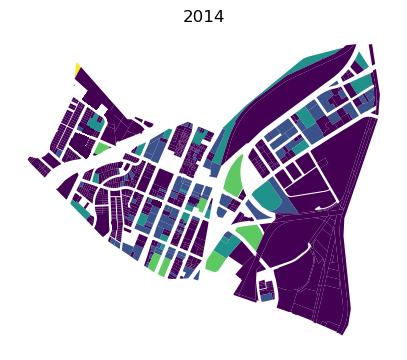

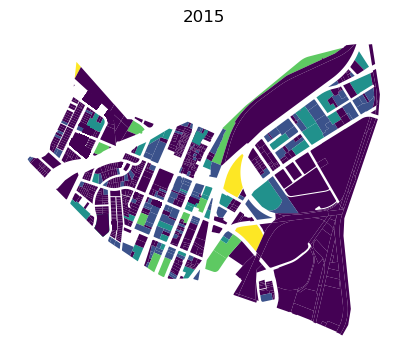

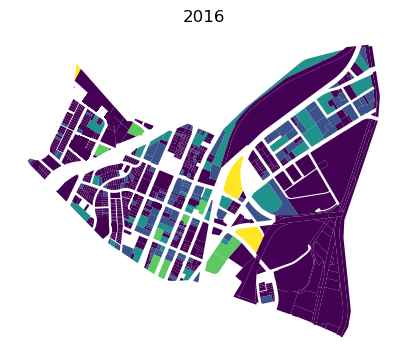

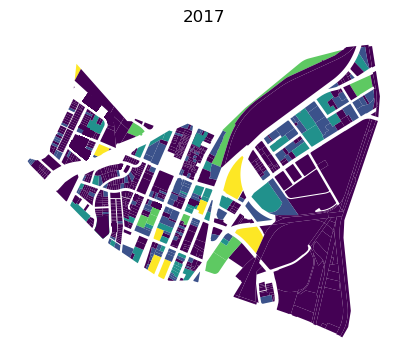

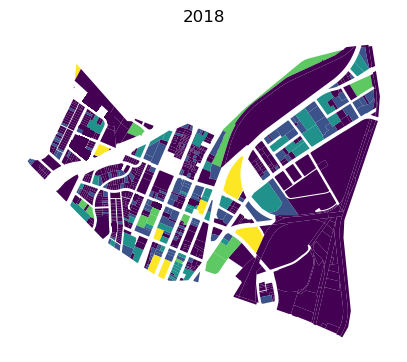

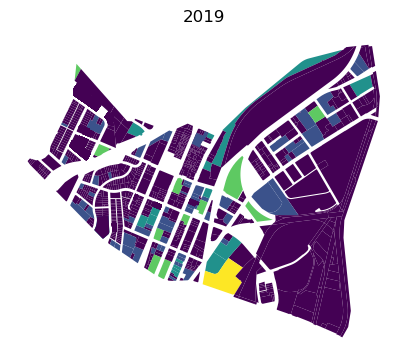

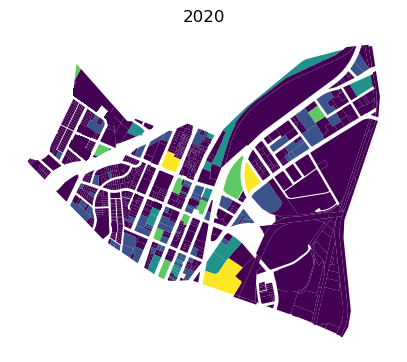

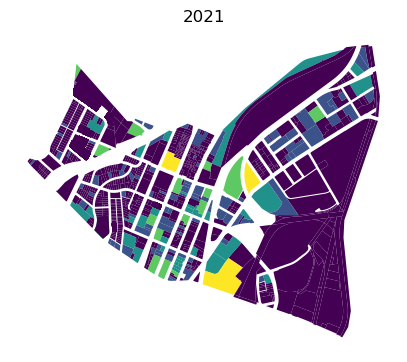

In [16]:
# Plot maps for land value by year

for parcel_dataframe in parcel_dataframes:
    fig, ax = plt.subplots(figsize=(5,5))
    parcel_dataframe.plot(ax=ax,
                          column='LandValue',
                          scheme='NaturalBreaks')
    ax.set_title(parcel_dataframe['Year'][0])
    ax.axis('off')

## Creating a Bar Graph of Total Value over Time

Now that I've mapped both Total Value and Land Value over time, I would like to combine all my disparate datasets into one, and then create a graph to see how total value has changed over time. In order to do this, I think I should create a histogram and make buckets for different levels of total value. 

In [17]:
# Combined all my dataframes into one big one
assessor_parcels_all = pandas.concat(parcel_dataframes)

In [18]:
# Checking to make sure it worked
assessor_parcels_all.sample(5)

TotalValue                                           geometry  LandValue  \
836         0.0  POLYGON Z ((-118.23760 34.06073 0.00000, -118....        0.0   
121     91125.0  POLYGON Z ((-118.23783 34.06026 0.00000, -118....    74054.0   
445    145659.0  POLYGON Z ((-118.24505 34.06599 0.00000, -118....    29126.0   
453    370317.0  POLYGON Z ((-118.24453 34.06594 0.00000, -118....   105801.0   
861         0.0  POLYGON Z ((-118.22806 34.06344 0.00000, -118....        0.0   

     YearBuilt  Year  
836          0  2020  
121       1950  2010  
445       1974  2016  
453       1970  2013  
861          0  2006

In [19]:
# Now I will break down TotalValue into different buckets
# First, take a look at the range and median values for this column

assessor_parcels_all.TotalValue.describe()

count    1.815400e+04
mean     9.160820e+05
std      3.620106e+06
min      0.000000e+00
25%      1.186308e+05
50%      2.525690e+05
75%      5.949892e+05
max      7.575109e+07
Name: TotalValue, dtype: float64

In [20]:
# Create a function that will sort each totalvalue row item into a new bucket, 0-4
def bucket_total_value(total_value):
    if (total_value < 50000):
        return "Less than 500k"
    if (total_value < 100000):
        return "500k to 999k"
    if (total_value < 250000):
        return "1mil to 2.49mil"
    if (total_value < 400000):
        return "2.5mil to 3.99mil"
    if (total_value < 7600000):
        return "4mil or More"

In [21]:
# Testing to make sure this works
bucket_total_value(3648954)

'4mil or More'

In [22]:
# Create new column totalvaluebracket to capture the function outputs
assessor_parcels_all['TotalValueBracket'] = assessor_parcels_all['TotalValue'].map(bucket_total_value)
assessor_parcels_all['TotalValueBracket'] = assessor_parcels_all['TotalValueBracket'].astype("string")

In [23]:
# Check to make sure it worked
assessor_parcels_all.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18154 entries, 0 to 1205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   TotalValue         18154 non-null  float64 
 1   geometry           18154 non-null  geometry
 2   LandValue          18154 non-null  float64 
 3   YearBuilt          18154 non-null  int64   
 4   Year               18154 non-null  int64   
 5   TotalValueBracket  17789 non-null  string  
dtypes: float64(2), geometry(1), int64(2), string(1)
memory usage: 992.8 KB


In [24]:
assessor_parcels_all.sample(5)

TotalValue                                           geometry  LandValue  \
972    277158.0  POLYGON Z ((-118.24498 34.06619 0.00000, -118....   134102.0   
39     467244.0  POLYGON Z ((-118.23892 34.05836 0.00000, -118....   460322.0   
491     47887.0  POLYGON Z ((-118.24289 34.06191 0.00000, -118....    34653.0   
463    435463.0  POLYGON Z ((-118.24481 34.06445 0.00000, -118....    95845.0   
807    208274.0  POLYGON Z ((-118.23831 34.06632 0.00000, -118....    83794.0   

     YearBuilt  Year  TotalValueBracket  
972       1988  2015  2.5mil to 3.99mil  
39        1950  2014       4mil or More  
491       1903  2015     Less than 500k  
463       1980  2008       4mil or More  
807       1950  2007    1mil to 2.49mil

In [25]:
# Now create a count column for each of the brackets
total_value_grouped = assessor_parcels_all.value_counts(['Year','TotalValueBracket']).reset_index(name='count')
total_value_grouped

Year TotalValueBracket  count
0   2021      4mil or More    536
1   2020      4mil or More    521
2   2019      4mil or More    502
3   2018      4mil or More    441
4   2017      4mil or More    419
..   ...               ...    ...
75  2017      500k to 999k     75
76  2018      500k to 999k     64
77  2019      500k to 999k     55
78  2020      500k to 999k     50
79  2021      500k to 999k     50

[80 rows x 3 columns]

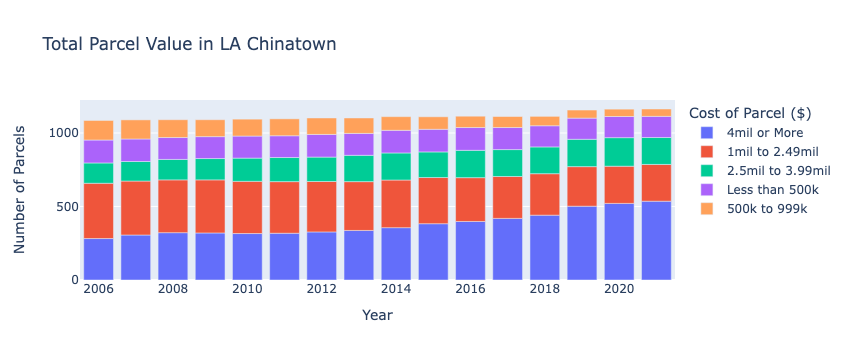

In [26]:
# Plot the counts
fig = px.bar(total_value_grouped,
             x='Year',
             y='count',
             color='TotalValueBracket',
             title='Total Parcel Value in LA Chinatown',
             labels = {
                 'Year':'Year',
                 'count':'Number of Parcels',
                 'TotalValueBracket':'Cost of Parcel ($)'
                    })
fig.show()

In [27]:
# I've tried multiple times to fix the legend, but all my attempts didn't work. I would like to learn how to fix this issue, or maybe see if there is a better way to plot this kind of data

## Creating a Line Graph Showing Rent and Parcel Value

I would like to create a line graph showing the increase in parcel value and gross rent in Chinatown. Going to download a data set from costar that has average gross rent in Chinatown for each year, then create a plotly graph.

In [28]:
# Looking at my assessor data again
assessor_parcels_all.sample(5)

TotalValue                                           geometry  \
47     4998000.0  POLYGON Z ((-118.24337 34.06420 0.00000, -118....   
658    2594828.0  POLYGON Z ((-118.23197 34.06645 0.00000, -118....   
1042    487334.0  POLYGON Z ((-118.24499 34.06438 0.00000, -118....   
504     135578.0  POLYGON Z ((-118.24222 34.06301 0.00000, -118....   
230      76082.0  POLYGON Z ((-118.24290 34.06199 0.00000, -118....   

      LandValue  YearBuilt  Year TotalValueBracket  
47    2958000.0       1984  2020      4mil or More  
658   1244375.0       1950  2015      4mil or More  
1042   243667.0       1885  2015      4mil or More  
504     31361.0       1972  2020   1mil to 2.49mil  
230     56415.0       1903  2014      500k to 999k

In [29]:
# Creating a new dataframe just with the data I need for the graph
columns_to_keep = ['TotalValue', 'Year']
total_value_df = assessor_parcels_all[columns_to_keep].copy()
total_value_df.sample(5)

TotalValue  Year
1089         0.0  2014
1024     47631.0  2010
61       60932.0  2011
266     162294.0  2021
534     815398.0  2021

In [30]:
# Averaging all the parcel value's for each year
total_value_avg_df = total_value_df.groupby(['Year'], as_index=False).mean()
total_value_avg_df.info()
total_value_avg_df.sample(16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        16 non-null     int64  
 1   TotalValue  16 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 384.0 bytes


Year    TotalValue
2   2008  6.594122e+05
11  2017  1.042144e+06
6   2012  7.785265e+05
3   2009  6.808104e+05
13  2019  1.242547e+06
9   2015  9.565077e+05
14  2020  1.329677e+06
1   2007  6.279601e+05
8   2014  9.022980e+05
7   2013  8.336502e+05
12  2018  1.109179e+06
15  2021  1.409407e+06
0   2006  5.478814e+05
10  2016  9.886011e+05
4   2010  6.852306e+05
5   2011  7.399112e+05

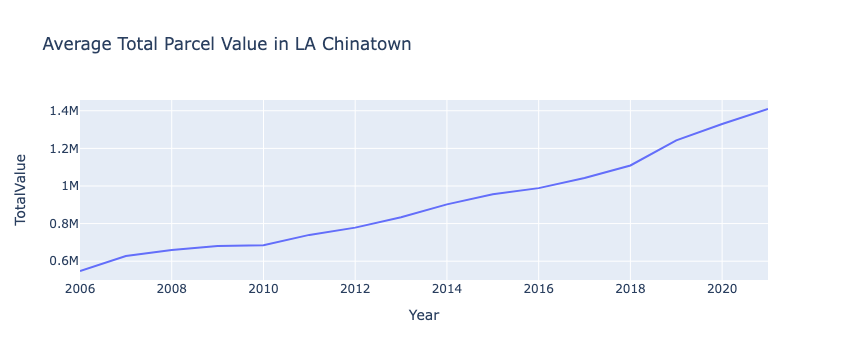

In [31]:
# Testing a line graph to make sure it worked
fig = px.line(total_value_avg_df, x='Year', y='TotalValue', 
              title='Average Total Parcel Value in LA Chinatown')
fig.show()              

In [32]:
# Pulling the data from Costar on rent
avg_rent_full_df = pandas.read_excel('Costar_Rent_DataTable.xlsx')
avg_rent_full_df.sample(5)

Period   Asset Value  Vacancy Rate  Market Asking Rent/Unit  \
26   2003  8.163150e+09      0.089887              1950.408213   
23   2006  1.118886e+10      0.061199              2235.254036   
20   2009  8.830583e+09      0.065458              2339.284357   
4    2024  2.447704e+10      0.100217              2805.649839   
29   2000  4.653658e+09      0.085035              1805.137832   

   Annual Rent Growth  Inventory Units Under Constr Units  \
26          -0.004581            14105                893   
23           0.068726            15665               1862   
20          -0.034778            18547                524   
4            0.016853            40665                  -   
29                  -            13845                 48   

   Under Constr % of Inventory  12 Mo Absorp Units  Market Sale Price/Unit  \
26                    0.063311               298.0           196460.985775   
23                    0.118864               565.0           269280.046941   
20                    0.028253               740.0           212523.970096   
4                            -              1723.0           589084.168243   
29                    0.003467               216.0           111998.701726   

   12 Mo Sales Vol 12 Mo Sales Vol Growth  Market Cap Rate  
26        29434000               0.459224         0.057205  
23        55932473               -0.33686         0.046848  
20        28645000              -0.748629         0.053017  
4                -                      -         0.036804  
29         8369000               0.109125         0.077193

In [33]:
# Renaming relevant columns so they're easier to access.
rent_renamed = avg_rent_full_df.rename(columns={'Period':'Year', 'Market Asking Rent/Unit':'Avg_Rent'})

In [34]:
# Creating new dataframe with relevant info
columns_to_keep = ['Year', 'Avg_Rent']
avg_rent_df = rent_renamed[columns_to_keep].copy()
avg_rent_df.info

<bound method DataFrame.info of         Year     Avg_Rent
0       2028  3012.268051
1       2027  2982.954905
2       2026  2927.078982
3       2025  2864.833666
4       2024  2805.649839
5   2023 EST  2759.149072
6   2023 YTD  2736.519999
7       2022  2747.348307
8       2021  2759.793987
9       2020  2484.859009
10      2019  2668.183603
11      2018  2672.985301
12      2017  2609.732017
13      2016  2574.607381
14      2015  2519.445898
15      2014  2432.144676
16      2013  2374.682665
17      2012  2338.071530
18      2011  2289.662075
19      2010  2265.107424
20      2009  2339.284357
21      2008  2423.571024
22      2007  2294.623235
23      2006  2235.254036
24      2005  2091.513096
25      2004  2018.945739
26      2003  1950.408213
27      2002  1959.383754
28      2001  1901.141211
29      2000  1805.137832>

In [35]:
# Changing Year column to integer variable instead of object
avg_rent_final_df = avg_rent_df[(avg_rent_df['Year']<='2021') & (avg_rent_df['Year']>='2006')]
avg_rent_final_df = avg_rent_final_df.astype({'Year':'int'})
avg_rent_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 8 to 23
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      16 non-null     int64  
 1   Avg_Rent  16 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 384.0 bytes


In [36]:
# Merging my two datasets: rent and parcel value
all_avg_data = total_value_avg_df.merge(avg_rent_final_df,on='Year')
all_avg_data.info()
all_avg_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        16 non-null     int64  
 1   TotalValue  16 non-null     float64
 2   Avg_Rent    16 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 512.0 bytes


Year    TotalValue     Avg_Rent
0   2006  5.478814e+05  2235.254036
1   2007  6.279601e+05  2294.623235
2   2008  6.594122e+05  2423.571024
3   2009  6.808104e+05  2339.284357
4   2010  6.852306e+05  2265.107424
5   2011  7.399112e+05  2289.662075
6   2012  7.785265e+05  2338.071530
7   2013  8.336502e+05  2374.682665
8   2014  9.022980e+05  2432.144676
9   2015  9.565077e+05  2519.445898
10  2016  9.886011e+05  2574.607381
11  2017  1.042144e+06  2609.732017
12  2018  1.109179e+06  2672.985301
13  2019  1.242547e+06  2668.183603
14  2020  1.329677e+06  2484.859009
15  2021  1.409407e+06  2759.793987

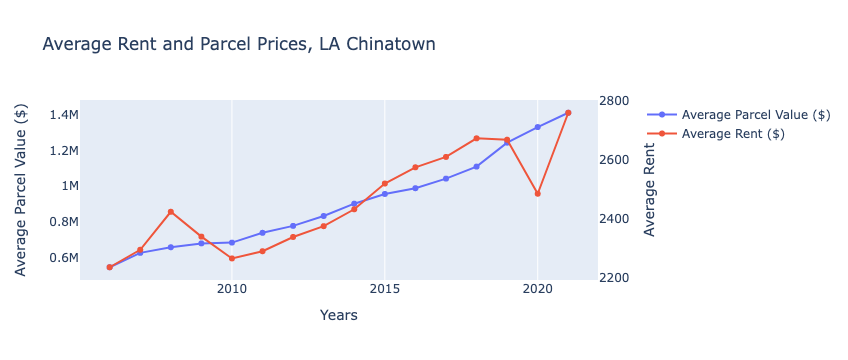

In [37]:
# Creating plotly graph
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=all_avg_data['Year'], y=all_avg_data['TotalValue'], name="Average Parcel Value ($)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=all_avg_data['Year'], y=all_avg_data['Avg_Rent'], name="Average Rent ($)"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Average Rent and Parcel Prices, LA Chinatown"
)

# Set x-axis title
fig.update_xaxes(title_text="Years")

# Set y-axes titles
fig.update_yaxes(title_text="Average Parcel Value ($)", secondary_y=False)
fig.update_yaxes(title_text="Average Rent", secondary_y=True)

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=False)

fig.show()